# Amal Aisha Alkali
## MSc. Data Science Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.feature_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score
from sklearn.utils import resample

In [2]:
court_case = 'Book2.csv'
court_case = pd.read_csv('Book2.csv')
court_case.describe() #summary of court case dataset

,decisionType,term,naturalCourt,docket,petitioner,respondent,jurisdiction,threeJudgeFdc,caseOrigin,caseOriginState,...,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes,justice,vote,opinion,direction,majority
count,414.000000,414.0,414.0,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,360.000000,...,414.000000,414.000000,414.0,414.000000,414.000000,414.000000,401.000000,401.000000,401.000000,401.000000
mean,1.260870,1946.0,1301.0,42.717391,141.000000,124.391304,1.326087,0.043478,112.282609,30.250000,...,81.152174,84.586957,1.0,7.130435,1.586957,82.444444,1.438903,1.346633,1.583541,1.817955
std,1.225067,0.0,0.0,27.412636,96.880346,102.458621,1.044967,0.204178,86.937900,16.457212,...,2.761467,4.396887,0.0,1.514224,1.597796,3.026206,0.828784,0.580556,0.493587,0.386364
min,1.000000,1946.0,1301.0,3.000000,4.000000,4.000000,1.000000,0.000000,3.000000,2.000000,...,78.000000,74.000000,1.0,5.000000,0.000000,78.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1946.0,1301.0,19.000000,100.000000,27.000000,1.000000,0.000000,55.000000,17.000000,...,78.000000,87.000000,1.0,6.000000,0.000000,80.000000,1.000000,1.000000,1.000000,2.000000
50%,1.000000,1946.0,1301.0,42.500000,130.500000,115.000000,1.000000,0.000000,92.000000,28.500000,...,81.000000,87.000000,1.0,7.000000,1.000000,82.000000,1.000000,1.000000,2.000000,2.000000
75%,1.000000,1946.0,1301.0,60.000000,177.000000,176.000000,1.000000,0.000000,123.000000,46.000000,...,82.000000,87.000000,1.0,9.000000,3.000000,85.000000,2.000000,2.000000,2.000000,2.000000
max,7.000000,1946.0,1301.0,142.000000,382.000000,405.000000,6.000000,1.000000,302.000000,52.000000,...,87.000000,87.000000,1.0,9.000000,4.000000,87.000000,5.000000,3.000000,2.000000,2.000000


In [41]:
court_case.head() #showing the first 5 rows of the dataset 

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,78,1,8,1,86,HHBurton,2.0,1.0,1.0,1.0
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,78,1,8,1,84,RHJackson,1.0,1.0,2.0,2.0
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,78,1,8,1,81,WODouglas,1.0,1.0,2.0,2.0
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,78,1,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,78,1,8,1,79,SFReed,1.0,1.0,2.0,2.0


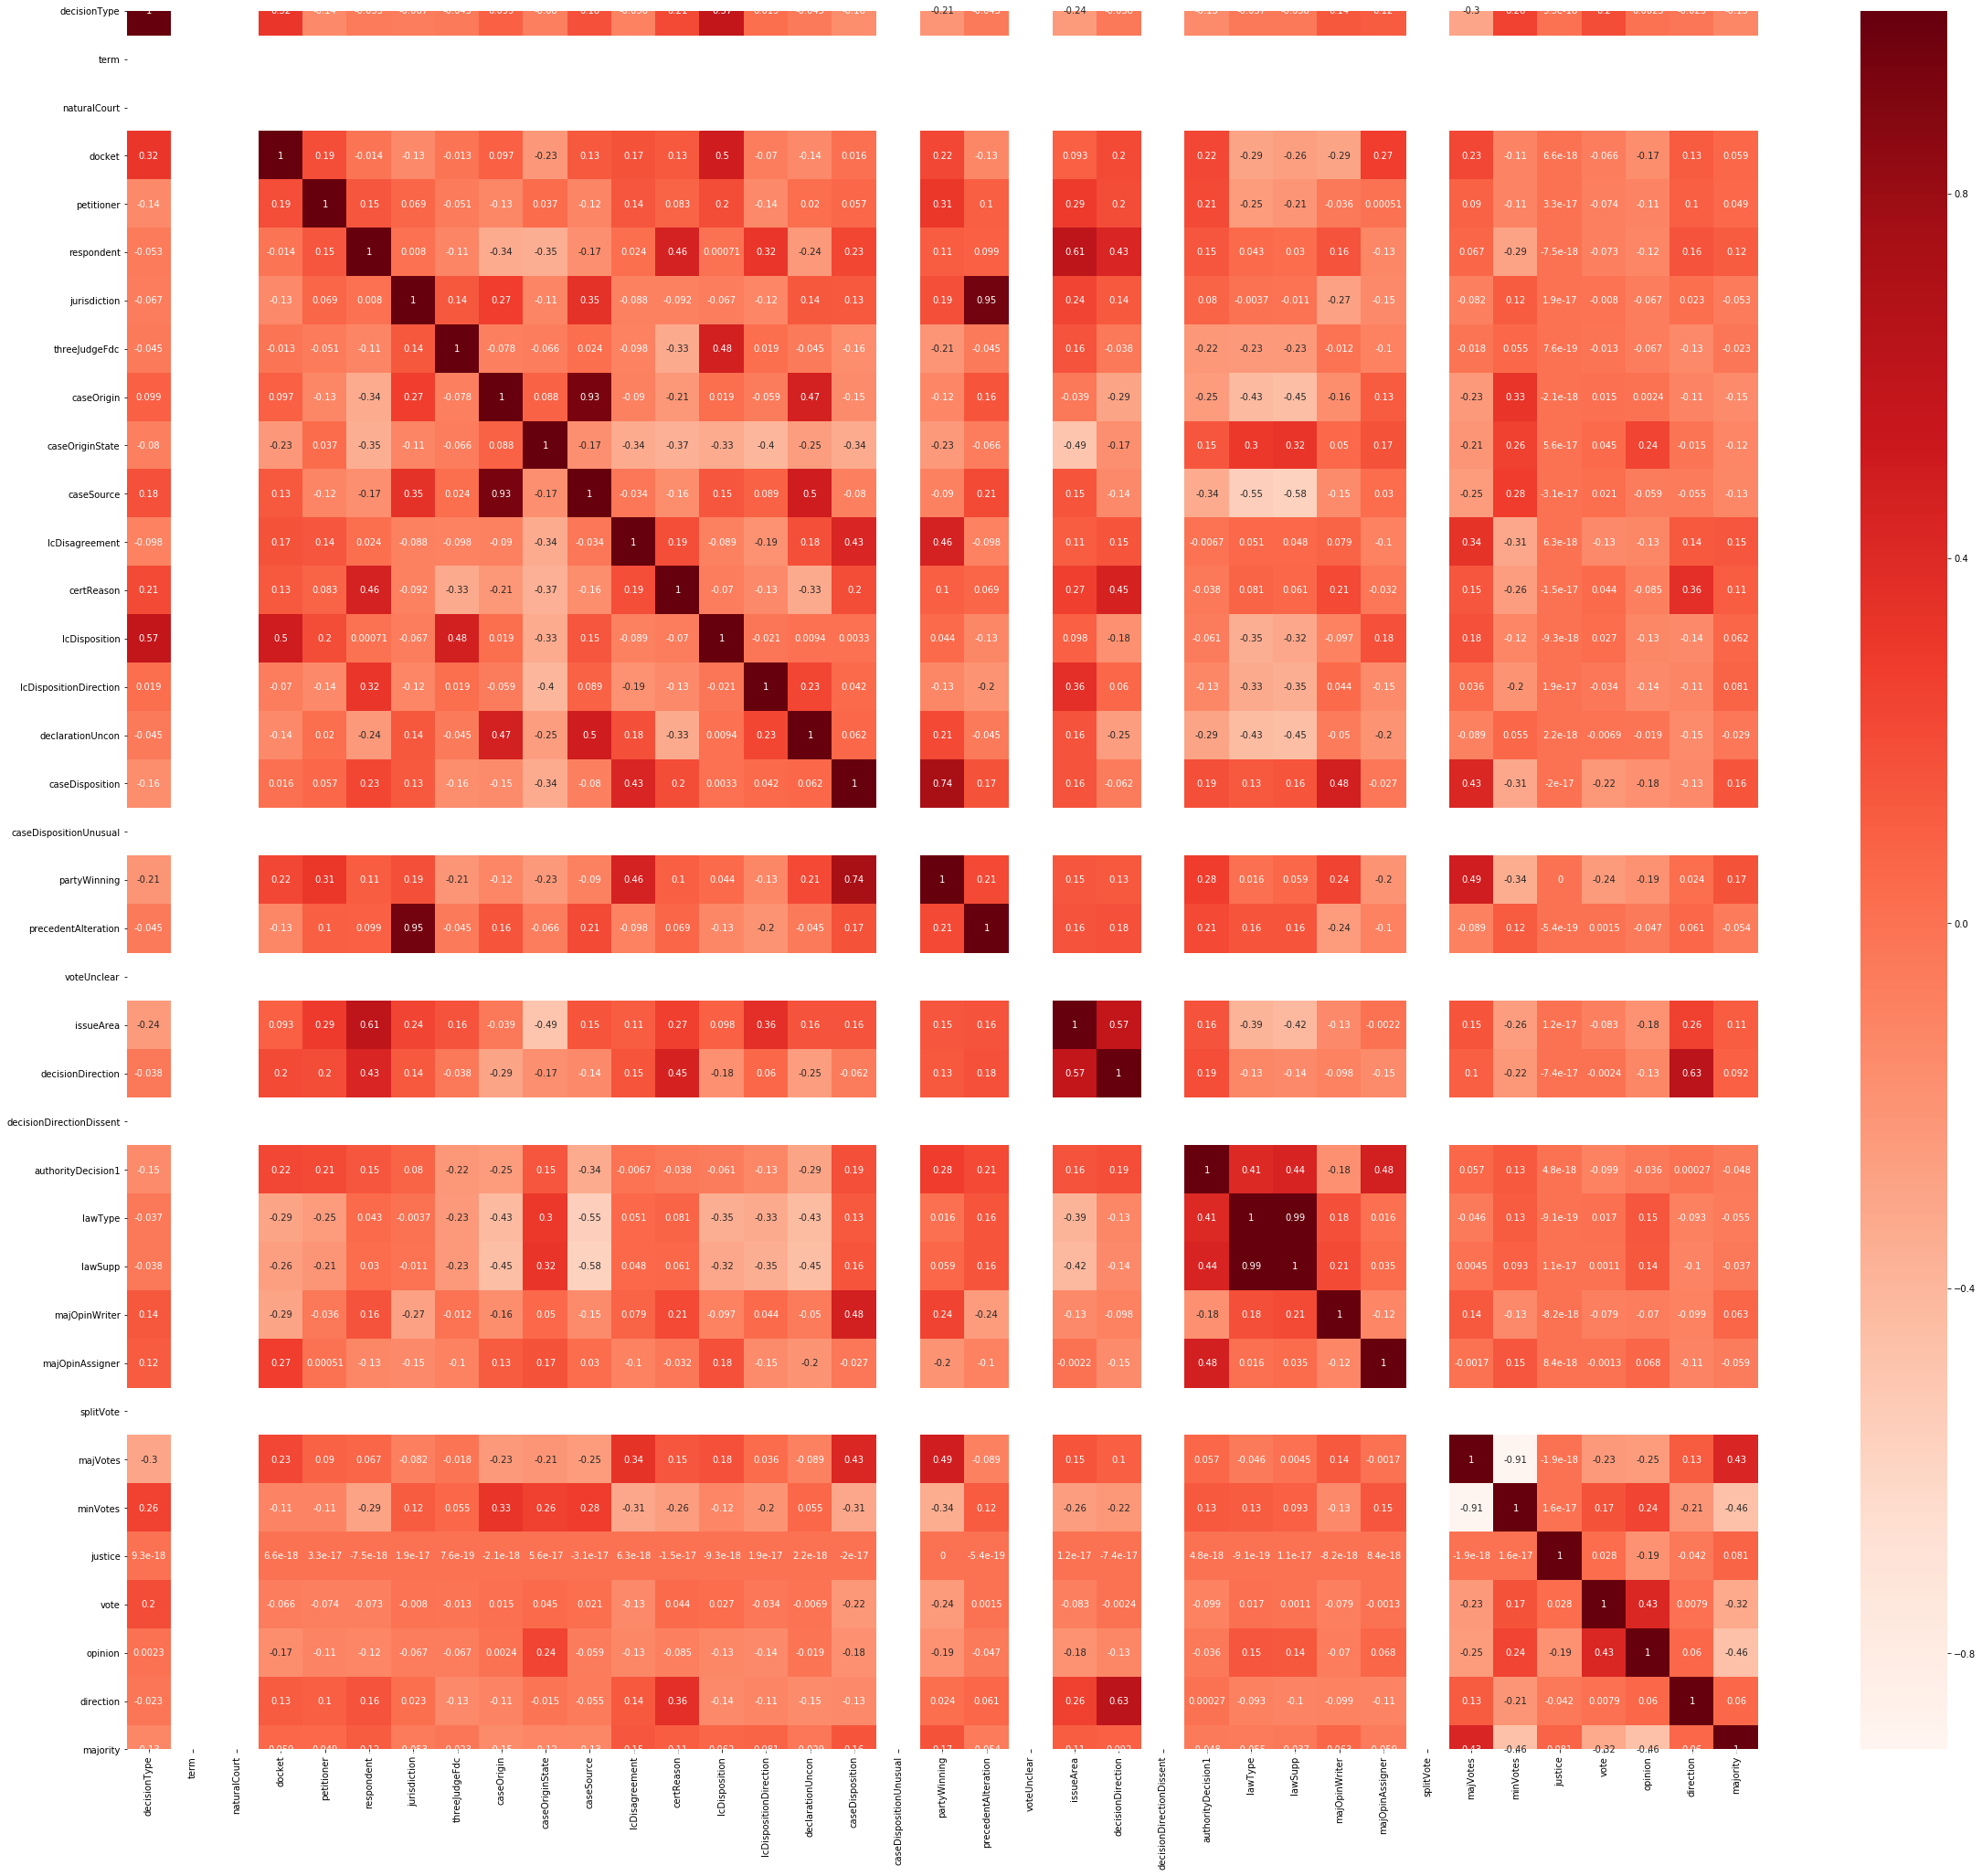

In [4]:
plt.figure(figsize=(40,35))
cor = court_case.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show() # plotting a correlation map that shows the correlation between all variables in the dataset

In [5]:
court_case.shape # showing number of colums and rows of the dataset

(414, 52)

In [6]:
court_case.columns # showing attribute name of the dataset

Index(['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
       'decisionType', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'term',
       'naturalCourt', 'chief', 'docket', 'caseName', 'dateArgument',
       'dateRearg', 'petitioner', 'respondent', 'jurisdiction',
       'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource',
       'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'declarationUncon', 'caseDisposition',
       'caseDispositionUnusual', 'partyWinning', 'precedentAlteration',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'lawType', 'lawSupp',
       'majOpinWriter', 'majOpinAssigner', 'splitVote', 'majVotes', 'minVotes',
       'justice', 'justiceName', 'vote', 'opinion', 'direction', 'majority'],
      dtype='object')

### Data Visualisation

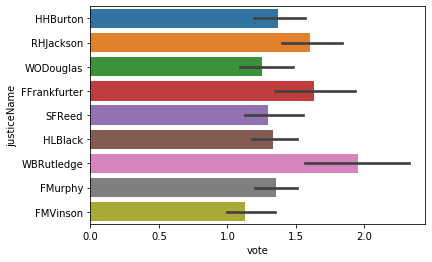

In [7]:
sns.barplot(x="vote" , y="justiceName" , data=court_case) 
#barchat of justice votes

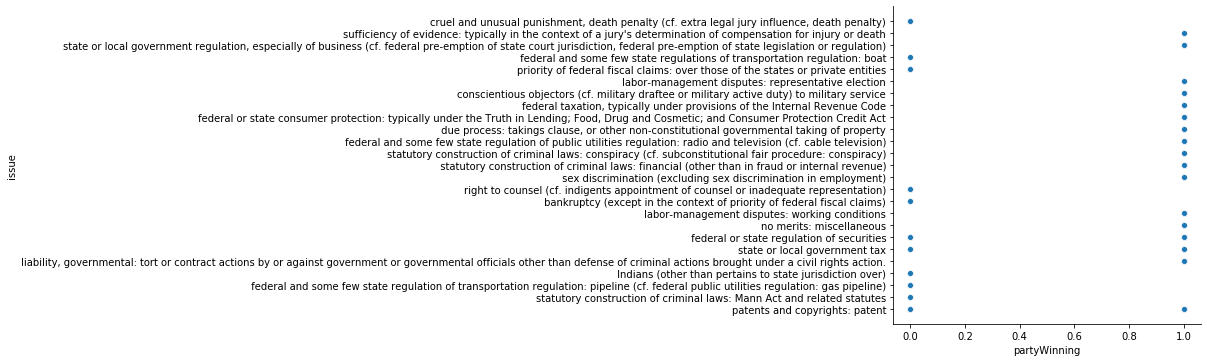

In [8]:
sns.relplot(x="partyWinning" , y="issue" , data=court_case)
#chart showing the issues that won their case

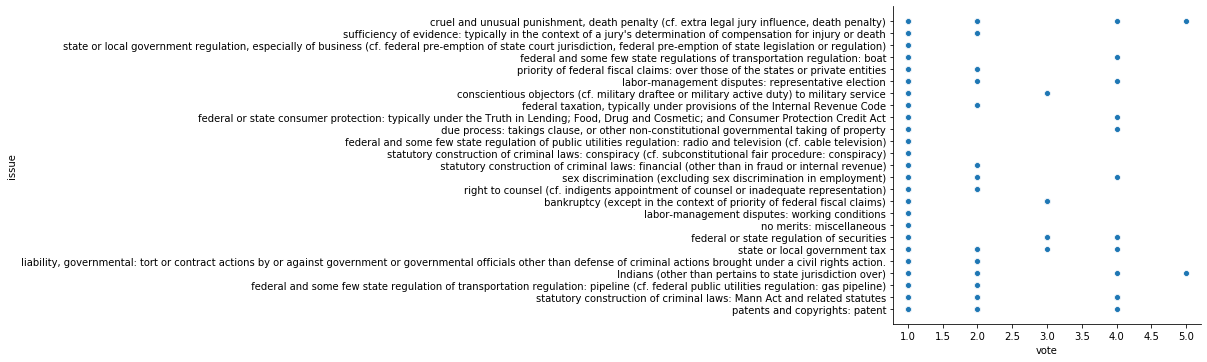

In [9]:
sns.relplot(x="vote" , y="issue" , data=court_case)
#chart showing the vote of issue by justice 

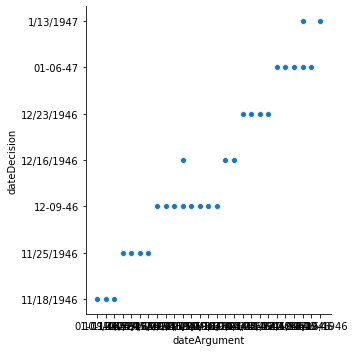

In [10]:
sns.relplot(x="dateArgument", y="dateDecision", data=court_case)

### Spliting data into x and y

In [11]:
df = court_case.drop(["caseId", "docketId", "caseIssuesId", "voteId", "dateDecision", "usCite", "sctCite", "ledCite", "lexisCite", "term" , "dateArgument",
       "dateRearg", "naturalCourt", "partyWinning"], axis=1)
y = court_case["partyWinning"]

In [12]:
df.head()

,decisionType,chief,docket,caseName,petitioner,respondent,jurisdiction,threeJudgeFdc,caseOrigin,caseOriginState,...,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority
0,1,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,198,172,6,0,51,6.0,...,78,1,8,1,86,HHBurton,2.0,1.0,1.0,1.0
1,1,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,198,172,6,0,51,6.0,...,78,1,8,1,84,RHJackson,1.0,1.0,2.0,2.0
2,1,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,198,172,6,0,51,6.0,...,78,1,8,1,81,WODouglas,1.0,1.0,2.0,2.0
3,1,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,198,172,6,0,51,6.0,...,78,1,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0
4,1,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,198,172,6,0,51,6.0,...,78,1,8,1,79,SFReed,1.0,1.0,2.0,2.0


### Missing Values

In [13]:
df.isnull().sum().sort_values(ascending=False).head(10)

caseOriginState    54
lawType            36
lawSupp            36
lcDisposition      27
majority           13
opinion            13
vote               13
direction          13
certReason          0
lcDisagreement      0
dtype: int64

In [14]:
#df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [15]:
x = df._get_numeric_data()
x.head()

,decisionType,docket,petitioner,respondent,jurisdiction,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,lcDisagreement,...,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes,justice,vote,opinion,direction,majority
0,1,24,198,172,6,0,51,6.0,29,0,...,78,78,1,8,1,86,2.0,1.0,1.0,1.0
1,1,24,198,172,6,0,51,6.0,29,0,...,78,78,1,8,1,84,1.0,1.0,2.0,2.0
2,1,24,198,172,6,0,51,6.0,29,0,...,78,78,1,8,1,81,1.0,1.0,2.0,2.0
3,1,24,198,172,6,0,51,6.0,29,0,...,78,78,1,8,1,80,4.0,2.0,2.0,2.0
4,1,24,198,172,6,0,51,6.0,29,0,...,78,78,1,8,1,79,1.0,1.0,2.0,2.0


In [16]:
x= x.fillna(x.median())

In [17]:
x.isnull().sum().sort_values(ascending=False).head(10)

majority                  0
caseSource                0
caseDisposition           0
declarationUncon          0
lcDispositionDirection    0
lcDisposition             0
certReason                0
lcDisagreement            0
caseOriginState           0
direction                 0
dtype: int64

In [18]:
x.describe()

,decisionType,docket,petitioner,respondent,jurisdiction,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,lcDisagreement,...,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes,justice,vote,opinion,direction,majority
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.0,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.260870,42.717391,141.000000,124.391304,1.326087,0.043478,112.282609,30.021739,69.521739,0.173913,...,81.152174,84.586957,1.0,7.130435,1.586957,82.444444,1.425121,1.335749,1.596618,1.823671
std,1.225067,27.412636,96.880346,102.458621,1.044967,0.204178,86.937900,15.354985,98.717899,0.379493,...,2.761467,4.396887,0.0,1.514224,1.597796,3.026206,0.819228,0.574542,0.491170,0.381561
min,1.000000,3.000000,4.000000,4.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,...,78.000000,74.000000,1.0,5.000000,0.000000,78.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,19.000000,100.000000,27.000000,1.000000,0.000000,55.000000,17.000000,23.000000,0.000000,...,78.000000,87.000000,1.0,6.000000,0.000000,80.000000,1.000000,1.000000,1.000000,2.000000
50%,1.000000,42.500000,130.500000,115.000000,1.000000,0.000000,92.000000,28.500000,28.000000,0.000000,...,81.000000,87.000000,1.0,7.000000,1.000000,82.000000,1.000000,1.000000,2.000000,2.000000
75%,1.000000,60.000000,177.000000,176.000000,1.000000,0.000000,123.000000,45.000000,30.000000,0.000000,...,82.000000,87.000000,1.0,9.000000,3.000000,85.000000,2.000000,2.000000,2.000000,2.000000
max,7.000000,142.000000,382.000000,405.000000,6.000000,1.000000,302.000000,52.000000,300.000000,1.000000,...,87.000000,87.000000,1.0,9.000000,4.000000,87.000000,5.000000,3.000000,2.000000,2.000000


### Outlier Detection


In [19]:
Q1 = x.quantile(0.15)
Q3 = x.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

decisionType                  0.0
docket                       56.0
petitioner                  218.0
respondent                  204.0
jurisdiction                  1.0
threeJudgeFdc                 0.0
caseOrigin                  256.0
caseOriginState              42.0
caseSource                  277.0
lcDisagreement                1.0
certReason                    8.0
lcDisposition                 1.0
lcDispositionDirection        1.0
declarationUncon              0.0
caseDisposition               1.0
caseDispositionUnusual        0.0
precedentAlteration           0.0
voteUnclear                   0.0
issueArea                     7.0
decisionDirection             1.0
decisionDirectionDissent      0.0
authorityDecision1            3.0
lawType                       4.0
lawSupp                     369.0
majOpinWriter                 7.0
majOpinAssigner               9.0
splitVote                     0.0
majVotes                      4.0
minVotes                      3.0
justice       

In [42]:
print(x < (Q1 - 1.5 * IQR)) |(x> (Q3 + 1.5 * IQR)) 
#valid values show false while true states the presence of an outlier

     decisionType  docket  petitioner  respondent  jurisdiction  \
0           False   False       False       False         False   
1           False   False       False       False         False   
2           False   False       False       False         False   
3           False   False       False       False         False   
4           False   False       False       False         False   
..            ...     ...         ...         ...           ...   
409         False   False       False       False         False   
410         False   False       False       False         False   
411         False   False       False       False         False   
412         False   False       False       False         False   
413         False   False       False       False         False   

     threeJudgeFdc  caseOrigin  caseOriginState  caseSource  lcDisagreement  \
0            False       False            False       False           False   
1            False       False       

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [43]:
x1 = x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]
x1.shape

(302, 34)

In [22]:
x.shape

(414, 34)

In [23]:
y.shape

(414,)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state= 0)
#train test data split

In [25]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
#standardize the data

In [26]:
kf =KFold(n_splits=5)
kf
#setting number of splits 

KFold(n_splits=5, random_state=None, shuffle=False)

In [27]:
def get_score(model, x_train, x_test, y_train, y_test):
   model.fit(x_train, y_train)
   return model.score(x_test, y_test)


In [28]:
#folds = StratifiedKFold(n_splits = 10)

In [29]:
scores_lr = []
scores_svm = []
scores_rf =[]
scores_knn =[]


for train_index, test_index in kf.split(x):
    
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scores_lr.append(get_score(LogisticRegression(),x_train, x_test, y_train, y_test))
    scores_svm.append(get_score(SVC(),x_train, x_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40),x_train, x_test, y_train, y_test))
    scores_knn.append(get_score(KNeighborsClassifier(n_neighbors=5),x_train, x_test, y_train, y_test))
    
    #fitting train and test data to the models

In [30]:
scores_lr

[0.13253012048192772,
 0.6746987951807228,
 0.7228915662650602,
 0.6867469879518072,
 0.34146341463414637]

In [31]:
scores_svm

[0.13253012048192772,
 0.6746987951807228,
 0.7108433734939759,
 0.6385542168674698,
 0.5609756097560976]

In [32]:
scores_rf

[0.13253012048192772, 1.0, 1.0, 1.0, 0.6707317073170732]

In [33]:
scores_knn

[0.13253012048192772,
 0.6746987951807228,
 0.7831325301204819,
 0.6746987951807228,
 0.5609756097560976]

In [34]:
x_res, y_res = resample(x_train, y_train, random_state=0)
print(x_res.shape, y_res.shape)

(332, 34) (332,)


In [35]:
train_x, test_x, train_y, test_y = train_test_split(x_res, y_res, test_size=0.2, random_state=0)
print(test_x.shape, test_y.shape)

(67, 34) (67,)


In [36]:
scores_lr = []
scores_svm = []
scores_rf =[]
scores_knn =[]


for train_index, test_index in kf.split(x):
    
    train_x, test_x = x.iloc[train_index], x.iloc[test_index]
    train_y, test_y = y.iloc[train_index], y.iloc[test_index]
    
    scores_lr.append(get_score(LogisticRegression(),train_x, test_x, train_y, test_y))
    scores_svm.append(get_score(SVC(),train_x, test_x, train_y, test_y))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40),train_x, test_x, train_y, test_y))
    scores_knn.append(get_score(KNeighborsClassifier(n_neighbors=5),train_x, test_x, train_y, test_y))

In [37]:
scores_lr

[0.13253012048192772,
 0.6746987951807228,
 0.7228915662650602,
 0.6867469879518072,
 0.34146341463414637]

In [38]:
scores_svm

[0.13253012048192772,
 0.6746987951807228,
 0.7108433734939759,
 0.6385542168674698,
 0.5609756097560976]

In [39]:
scores_rf

[1.0, 1.0, 1.0, 1.0, 0.5609756097560976]

In [40]:
scores_knn

[0.13253012048192772,
 0.6746987951807228,
 0.7831325301204819,
 0.6746987951807228,
 0.5609756097560976]